## Content

1. **[Import packages](#import_packages)**

2. **[Reading data](#load_data)**

3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.4 - [Dataframe information](#Data_info)
    
4. **[EDA](#eda)**
    - 4.1 - [Count Plot](#Count_plot)
    - 4.2 - [Pie Plot](#Pie)
    - 4.3 - [Checking for outlier using box_plot](#box_plot)
    - 4.4 - [Outlier](#outlier)
    - 4.5 - [Distribution Plot](#distribution_plot)
    - 4.6 - [Null Values](#null_values)
    - 4.7 - [Heat Map](#heat_map)
    - 4.8 - [Multivariate Analysis](#multivariate)
        - 4.8.2 - [Correlation Matrix](#corr_mat)
    - 4.9 - [Balancing Data via SMOTE](#bal_data)
    - 4.10 - [Feature Scaling](#scale)
    
5. **[Model Building](#model)**
    - 5.1 - [Logistic Regression](#log_reg)
    - 5.2 - [Naive Bayes](#naive_bayes)
    - 5.3 - [K-Nearest Neighbour](#knn)
    - 5.4 - [Support Vector Machine](#svm)
    - 5.5 - [Decision Tree](#decision_tree)
    - 5.6 - [Random Forest](#random_forest)
    - 5.7 - [ADA Boost](#ada)
    - 5.8 - [XGBM](#xgbm)
    - 5.9 - [Bagging classifier](#bag)
    
6. **[Conclusion](#conclusion)**


<a id='import_packages'></a>
# 1. Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<a id='load_data'></a>
# 2. Reading data

In [2]:
water = pd.read_csv(r'C:\Users\Tarun\Desktop\DS\Machine Learning\Capstone_project\water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Feature description:

1. ph: pH of water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

###### Units : 
1. mg/L: milligram per litre
2. ppm: parts per million
3. μS/cm : MicroSiemens per cm
4. μg/L : Micrograms per Liter
5. NTU : nephelometric turbidity units

5 samples to know the random data in the dataframe

In [3]:
water.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1981,NaN,209.751955,20214.21655,6.045078,323.788383,539.464723,20.278990,72.735207,4.258489,1
1039,8.937802,147.916892,10562.46054,3.694275,371.176313,480.320218,16.980755,61.158047,2.831234,0
1080,7.603775,214.682778,11459.62244,10.999995,398.920869,321.069074,12.010676,58.100707,3.584985,1
1905,6.967861,183.933476,13401.04439,6.457687,371.788364,433.239429,14.584231,66.029156,4.893215,1
3034,6.988206,144.209535,33357.51586,6.771945,NaN,409.006789,17.880332,54.111785,1.899683,0


<a id='data_preparation'></a>

# 3. Data preparation

<a id='data_dimension'></a>
### 3.1 Dimensions of Dataset
To get an idea of about instances (rows) and attributes (columns) in the data using the shape property.

In [4]:
water.shape

(3276, 10)

<a id='Stat_sum'></a>

### 3.2 Statistical summary of data

In [5]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<a id='check_data_type'></a>

### 3.3 Checking data types

In [6]:
water.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<a id='Data_info'></a>


### 3.4 Information of datatypes as well as null count

In [7]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# 4. EDA
<a id='eda'></a>

### 4.1 Count plot to know the feature water potability
<a id='Count_plot'></a>

<AxesSubplot:xlabel='Potability', ylabel='count'>

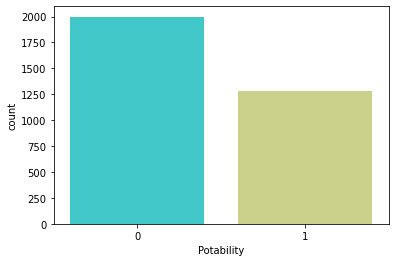

In [8]:
sns.countplot(water["Potability"] ,data=water,palette = 'rainbow')

### 4.2 Pie plot to know the feature water potability in perecentage
<a id='Pie'></a>

Text(0.5, 1.0, 'Water Potabilty')

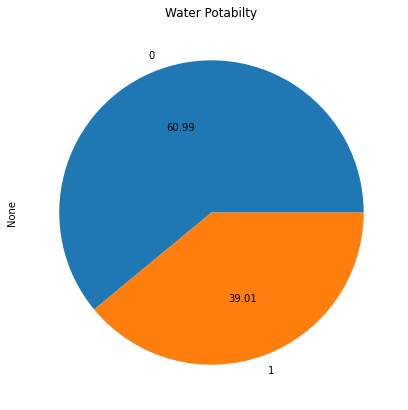

In [9]:
plt.figure(figsize=(9,7))
water.groupby('Potability').size().plot(kind='pie', autopct='%.2f')
plt.title('Water Potabilty')

### Potability : 1    
### Not-Potability  : 0

### 4.3 Checking for outliers
<a id='box_plot'></a>

### Plotting box plot after outlier treatment

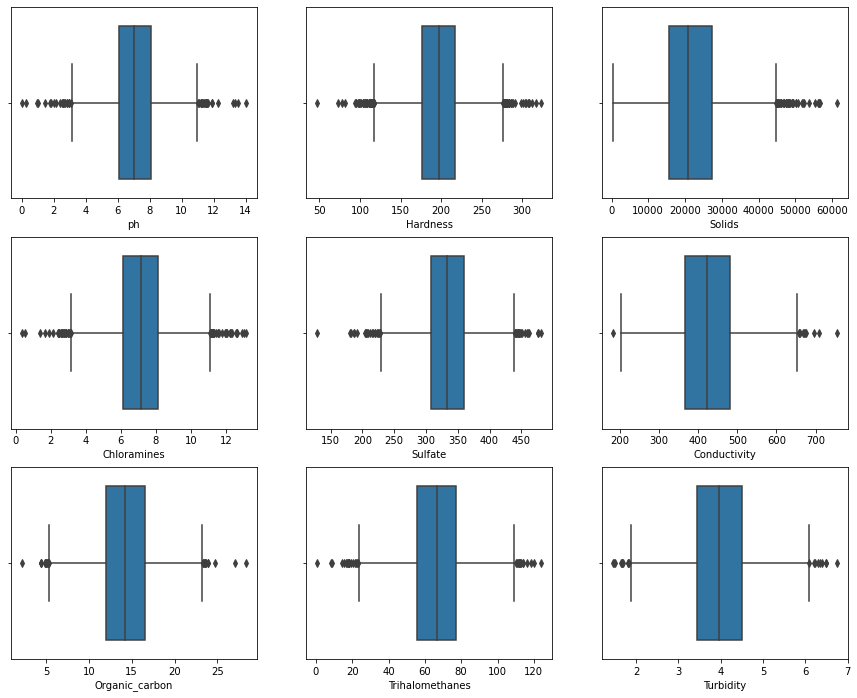

In [10]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.boxplot(water["ph"])

plt.subplot(3,3,2)
sns.boxplot(water["Hardness"])

plt.subplot(3,3,3)
sns.boxplot(water["Solids"])

plt.subplot(3,3,4)
sns.boxplot(water["Chloramines"])

plt.subplot(3,3,5)
sns.boxplot(water["Sulfate"])

plt.subplot(3,3,6)
sns.boxplot(water["Conductivity"])

plt.subplot(3,3,7)
sns.boxplot(water["Organic_carbon"])

plt.subplot(3,3,8)
sns.boxplot(water["Trihalomethanes"])

plt.subplot(3,3,9)
sns.boxplot(water["Turbidity"])

plt.show()

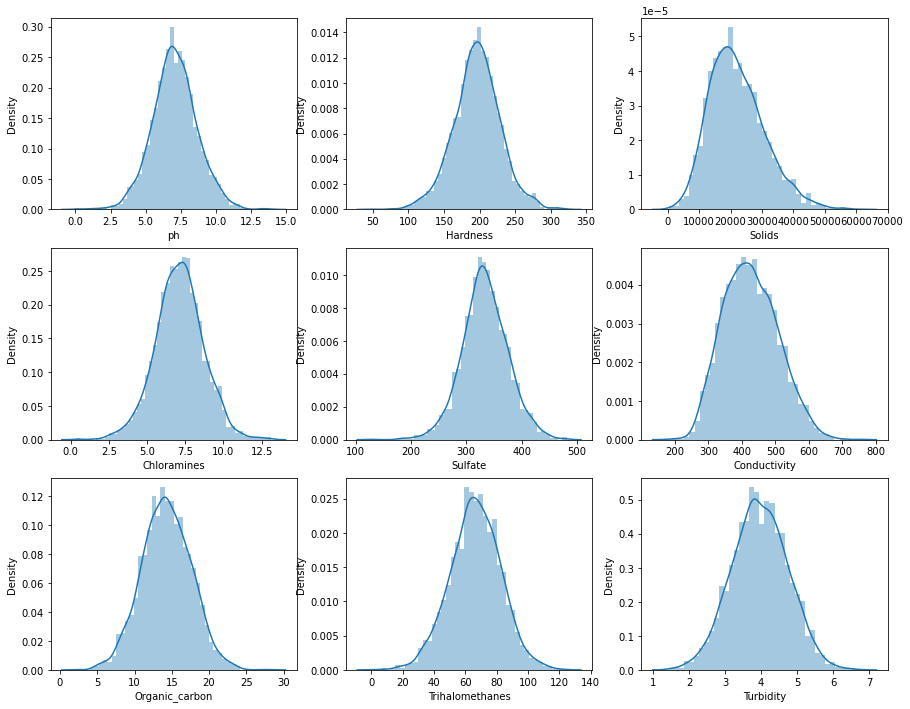

In [11]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.distplot(water["ph"])

plt.subplot(3,3,2)
sns.distplot(water["Hardness"])

plt.subplot(3,3,3)
sns.distplot(water["Solids"])

plt.subplot(3,3,4)
sns.distplot(water["Chloramines"])

plt.subplot(3,3,5)
sns.distplot(water["Sulfate"])

plt.subplot(3,3,6)
sns.distplot(water["Conductivity"])

plt.subplot(3,3,7)
sns.distplot(water["Organic_carbon"])

plt.subplot(3,3,8)
sns.distplot(water["Trihalomethanes"])

plt.subplot(3,3,9)
sns.distplot(water["Turbidity"])

plt.show()

All features are normally distributed

### 4.4 Outlier treatment
<a id='outlier'></a>

#### An outlier is an observation that lies in abnormal distance from other values in a random sample from a population.
#### As we saw above the black dots before/after the plot are the values which are considered as outliers

In [12]:
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending = False).index[0:8]:
        x=np.array(base_dataset[i])
        qr1 = np.quantile(x, 0.25)
        qr3 = np.quantile(x, 0.75)
        iqr = qr3-qr1
        utv = qr3+(1.5*(iqr))
        ltv = qr1-(1.5*(iqr))
        y = [] 
        for p in x:
            if p<ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_dataset[i] = y

In [13]:
outliers_transform(water)

In [14]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

### 4.5 Distribution plot to check whether it is normally distributed or not
<a id='distribution_plot'></a>

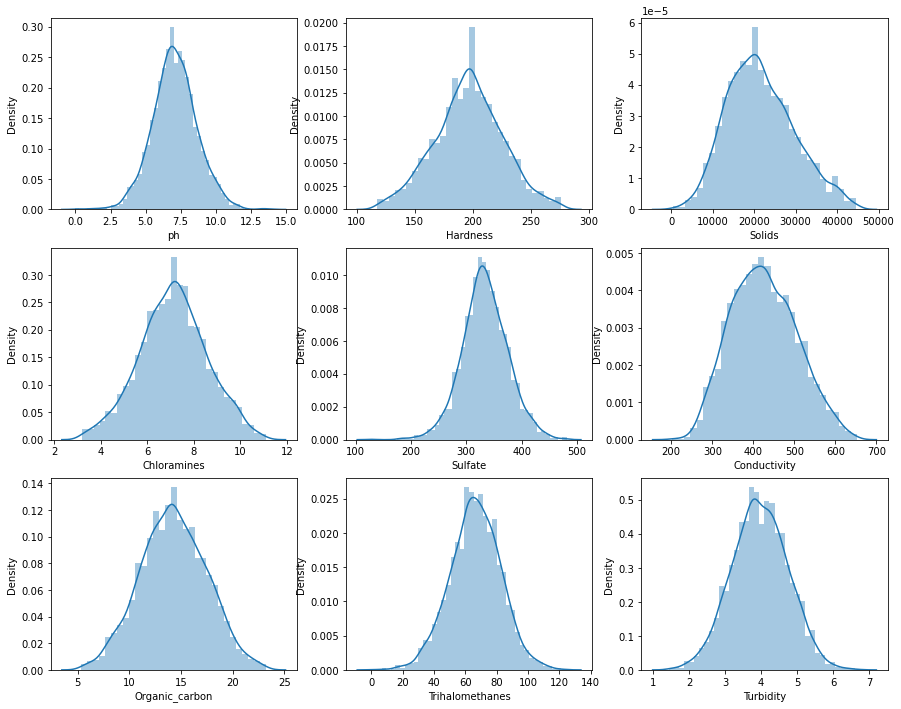

In [15]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.distplot(water["ph"])

plt.subplot(3,3,2)
sns.distplot(water["Hardness"])

plt.subplot(3,3,3)
sns.distplot(water["Solids"])

plt.subplot(3,3,4)
sns.distplot(water["Chloramines"])

plt.subplot(3,3,5)
sns.distplot(water["Sulfate"])

plt.subplot(3,3,6)
sns.distplot(water["Conductivity"])

plt.subplot(3,3,7)
sns.distplot(water["Organic_carbon"])

plt.subplot(3,3,8)
sns.distplot(water["Trihalomethanes"])

plt.subplot(3,3,9)
sns.distplot(water["Turbidity"])

plt.show()

### 4.6 Check for null values
<a id='null_values'></a>

In [16]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### 4.7 Heat Map
<a id='heat_map'></a>

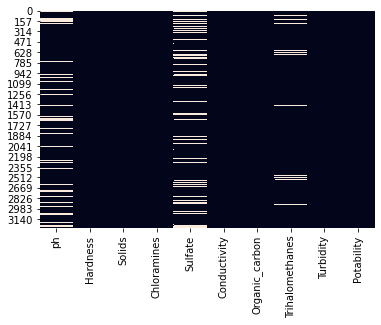

In [17]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(water.isnull(), cbar=False)

# display the plot
plt.show()

In [18]:
#Replace null values based on the group/sample mean
water['ph']=water['ph'].fillna(water.groupby(['Potability'])['ph'].transform('mean'))
water['Sulfate']=water['Sulfate'].fillna(water.groupby(['Potability'])['Sulfate'].transform('mean'))
water['Trihalomethanes']=water['Trihalomethanes'].fillna(water.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [19]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [20]:
water.shape

(3276, 10)

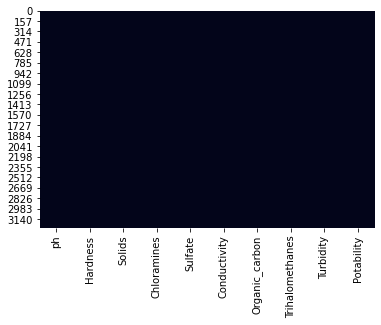

In [21]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(water.isnull(), cbar=False)

# display the plot
plt.show()

In [22]:
water.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
105,8.490572,204.123648,22989.796390,8.270793,358.847115,435.000898,17.084246,62.421637,3.875557,0
543,4.319441,186.056179,30565.578390,9.811168,276.833932,282.687402,13.448689,66.303555,3.241972,0
1209,7.828740,176.727511,33337.109650,5.438776,286.992631,290.118613,5.871941,75.714425,5.199447,1
863,7.685397,230.335708,7324.701425,7.991366,331.512533,492.850391,14.233952,74.068658,4.179187,0
1134,7.535700,221.792481,14829.745970,6.701159,366.412200,583.436487,17.731882,59.686076,4.208354,1


### Comparing the features with target variable as a hue

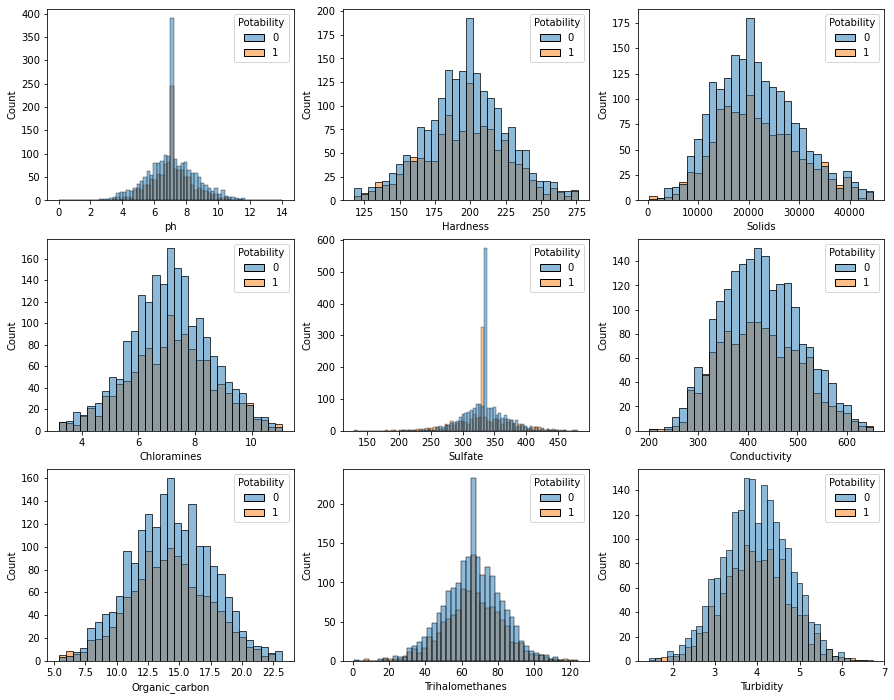

In [23]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.histplot(water, x="ph", hue="Potability")

plt.subplot(3,3,2)
sns.histplot(water, x="Hardness", hue="Potability")

plt.subplot(3,3,3)
sns.histplot(water, x="Solids", hue="Potability")

plt.subplot(3,3,4)
sns.histplot(water, x="Chloramines", hue="Potability")

plt.subplot(3,3,5)
sns.histplot(water, x="Sulfate", hue="Potability")

plt.subplot(3,3,6)
sns.histplot(water, x="Conductivity", hue="Potability")

plt.subplot(3,3,7)
sns.histplot(water, x="Organic_carbon", hue="Potability")

plt.subplot(3,3,8)
sns.histplot(water, x="Trihalomethanes", hue="Potability")

plt.subplot(3,3,9)
sns.histplot(water, x="Turbidity", hue="Potability")

plt.show()

### 4.8 Multivariate analysis
<a id='multivariate'></a>

#### Correlation matrix is a square matrix giving the covariance between each pair of elements of a given random vector.

In [24]:
corr = water.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.097792,-0.076046,-0.036547,0.014785,0.017619,0.040496,0.003009,-0.036211,-0.003848
Hardness,0.097792,1.000000,-0.044991,-0.008571,-0.090677,-0.028899,0.001916,-0.016446,-0.021104,-0.012704
Solids,-0.076046,-0.044991,1.000000,-0.055797,-0.135929,0.006705,0.016834,-0.017745,0.026166,0.025051
Chloramines,-0.036547,-0.008571,-0.055797,1.000000,0.046348,-0.018787,-0.006775,0.010410,-0.013485,0.021052
Sulfate,0.014785,-0.090677,-0.135929,0.046348,1.000000,-0.014027,0.023661,-0.025797,-0.009523,-0.026957
Conductivity,0.017619,-0.028899,0.006705,-0.018787,-0.014027,1.000000,0.015019,-0.000583,0.007564,-0.008881
Organic_carbon,0.040496,0.001916,0.016834,-0.006775,0.023661,0.015019,1.000000,-0.013525,-0.025371,-0.027250
Trihalomethanes,0.003009,-0.016446,-0.017745,0.010410,-0.025797,-0.000583,-0.013525,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.021104,0.026166,-0.013485,-0.009523,0.007564,-0.025371,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.012704,0.025051,0.021052,-0.026957,-0.008881,-0.027250,0.007305,0.001581,1.000000


#### 4.8.1 Correlation Matrix
<a id='corr_mat'></a>

<AxesSubplot:>

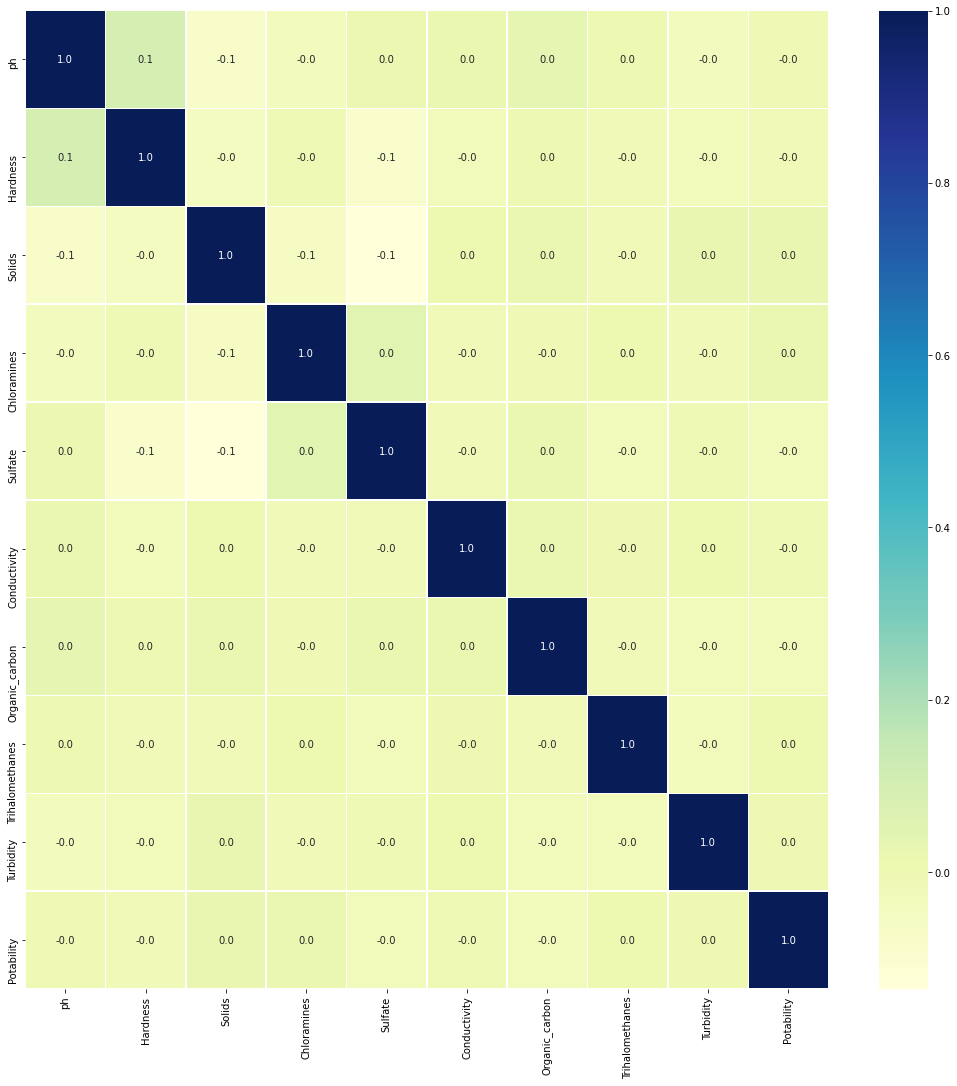

In [25]:
fig,ax = plt.subplots(figsize = (18,18))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt='.1f',ax=ax,cmap = 'YlGnBu')

As we can see there are no features correlating to each other, no need of feature removal here

In [26]:
water['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

###### Since the the date is unbalanced we are using SMOTE() method to balance it

### 4.9 Balancing data using SMOTE()
<a id='bal_data'></a>

#### SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique and creates new minority class synthetic samples.
#### Creating a Training dataset with 80% of the original dataset and testing dataset with remaining 20% of original dataset.

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [27]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
x=water.drop(['Potability'], axis=1)
y=water['Potability']
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
x_train, y_train =samp.fit_resample(x_train,y_train)

### 4.10 Feature Scaling
<a id='scale'></a>

#### Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

In [28]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [29]:
x_train

array([[ 1.30355432,  0.10819312, -0.16478206, ...,  1.70207254,
        -0.15485168, -1.01593916],
       [ 0.58353419, -0.88500741, -1.8064159 , ...,  2.83264489,
         0.47555942,  0.41419771],
       [-1.34605567,  0.08509992, -0.57887324, ..., -0.58576914,
        -0.01057378,  1.17320353],
       ...,
       [ 0.33548671, -0.74161709, -0.87161066, ..., -1.78226685,
         0.48014827,  0.233348  ],
       [ 0.30479921,  0.41512368, -1.2082473 , ..., -1.10032743,
         1.12850315,  0.78336343],
       [-0.36105081, -1.70946586,  0.42090116, ..., -1.56676038,
         0.02472868,  0.95708234]])

In [30]:
x_test

array([[-0.71337679, -1.22167602, -0.82273819, ..., -0.65071723,
         0.16407586, -0.65890654],
       [-0.00609439,  1.29177867,  0.66156873, ...,  0.78418073,
        -1.00070472,  0.4329316 ],
       [ 1.4938896 , -0.96865529, -0.08001719, ..., -0.76627085,
        -0.28083911, -0.8816049 ],
       ...,
       [-0.76649849,  2.78296889, -0.04365187, ..., -0.81982965,
         1.68544234,  1.45675674],
       [-0.00609439,  0.96827044, -0.68771512, ...,  0.29043029,
        -1.20335183,  0.26338636],
       [ 0.35151305,  0.12060783, -1.23666978, ...,  1.15637123,
        -0.24214498, -0.34968457]])

In [31]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (3250, 9)
x_test (656, 9)
y_train (3250,)
y_test (656,)


# 5. MODEL BUILDING
<a id='model'></a>

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 5.1 Logistic regression
<a id='log_reg'></a>


#### Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

#FIT THE MODEL WITH DATA
log_reg.fit(x_train,y_train)
y_pred_log_reg= log_reg.predict(x_test)

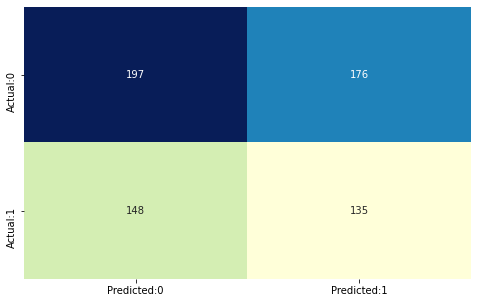

In [34]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
#label tje confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
#set size of the plot
plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)


# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations

plt.show()

In [35]:
from sklearn.metrics import classification_report
result = classification_report(y_test, y_pred_log_reg)
print(result)

              precision    recall  f1-score   support

           0       0.57      0.53      0.55       373
           1       0.43      0.48      0.45       283

    accuracy                           0.51       656
   macro avg       0.50      0.50      0.50       656
weighted avg       0.51      0.51      0.51       656



#### AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 

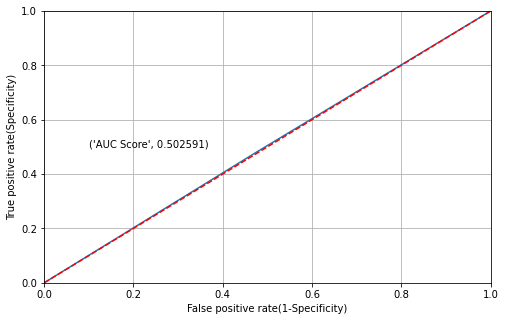

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_log_reg)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.1,y=0.5,s=('AUC Score',round(roc_auc_score(y_test,y_pred_log_reg),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [37]:
import sklearn.metrics as metrics
#compiling the required information
#create a list of column names
cols = ["Model", "AUC Score", "Precision Score", "Recall Score", "Accuracy Score", "f1-score"]

#creating the required information
result_tabulation = pd.DataFrame(columns=cols)


metrics = pd.Series({"Model" : "logistic_regression ", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_log_reg),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_log_reg),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_log_reg),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_log_reg),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_log_reg)})
#appending our result table
result_tabulation = result_tabulation.append(metrics , ignore_index=True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545


### 5.2 Naive Bayes
<a id='naive_bayes'></a>


#### Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features (see Bayes classifier). They are among the simplest Bayesian network models

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

gnb = GaussianNB()
GNB = OneVsRestClassifier(gnb)
GNB.fit(x_train,y_train)
y_pred_GNB = GNB.predict(x_test)

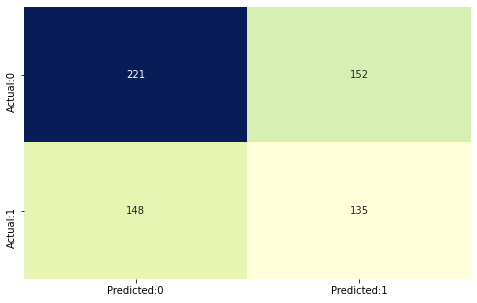

In [39]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test,y_pred_GNB)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                          index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()



In [40]:
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred_GNB)
print(result)

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       373
           1       0.47      0.48      0.47       283

    accuracy                           0.54       656
   macro avg       0.53      0.53      0.53       656
weighted avg       0.54      0.54      0.54       656



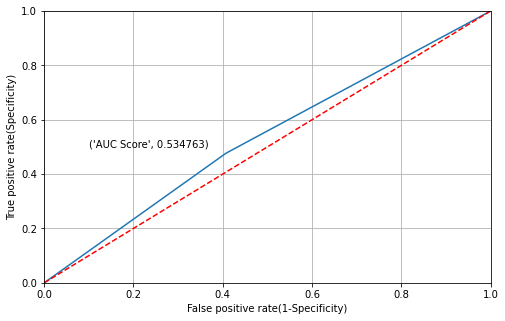

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_GNB)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.1,y=0.5,s=('AUC Score',round(roc_auc_score(y_test,y_pred_GNB),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [42]:
import sklearn.metrics as metrics
#compiling the required information
metrics = pd.Series({"Model" : "Naive Bayes ", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_GNB),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_GNB),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_GNB),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_GNB),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_GNB)})
#appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684


### 5.3 KNN
<a id='knn'></a>


#### K-Nearest Neighbours algorithm (k-NN) is a non-parametric supervised learning. KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)

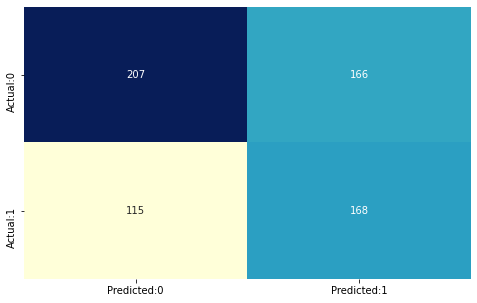

In [44]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test,y_pred_knn)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                          index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()



In [45]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_pred_knn)
print(result)

              precision    recall  f1-score   support

           0       0.64      0.55      0.60       373
           1       0.50      0.59      0.54       283

    accuracy                           0.57       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.58      0.57      0.57       656



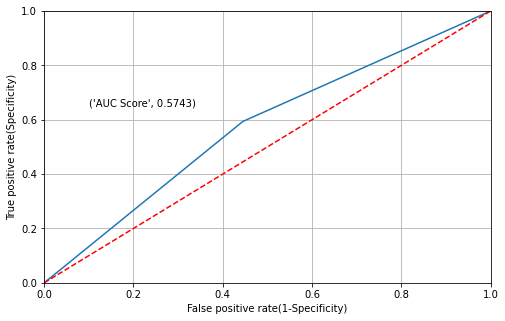

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_knn)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.1,y=0.65,s=('AUC Score',round(roc_auc_score(y_test,y_pred_knn),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [47]:
import sklearn.metrics as metrics
#compiling the required information
metrics = pd.Series({"Model" : "KNN ", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_knn),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_knn),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_knn),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_knn),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_knn)})
#appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684
2,KNN,0.574300,0.502994,0.593640,0.571646,0.544571


### 5.4 Support Vector Machine
<a id='svm'></a>


#### Support Vector Machine or SVM is a supervised and linear Machine Learning algorithm most commonly used for solving classification problems and is also referred to as Support Vector Classification.

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 1)
classifier.fit(x_train,y_train)

y_pred_svm = classifier.predict(x_test)

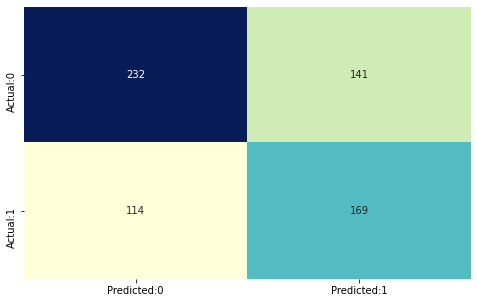

In [49]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test,y_pred_svm)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                          index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()



In [50]:
from sklearn.metrics import classification_report

result = classification_report(y_test,y_pred_svm)
print(result)

              precision    recall  f1-score   support

           0       0.67      0.62      0.65       373
           1       0.55      0.60      0.57       283

    accuracy                           0.61       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.62      0.61      0.61       656



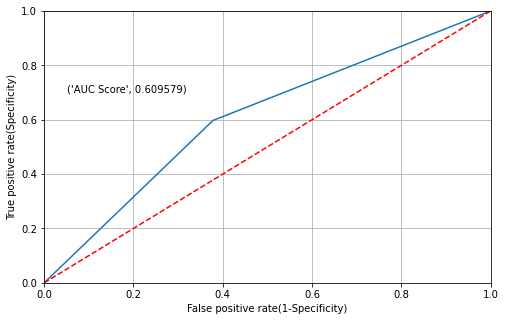

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_svm)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.05,y=0.7,s=('AUC Score',round(roc_auc_score(y_test,y_pred_svm),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [52]:
import sklearn.metrics as metrics
#compiling the required information
metrics = pd.Series({"Model" : "SVM ", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_svm),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_svm),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_svm),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_svm),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_svm)})
#appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684
2,KNN,0.574300,0.502994,0.593640,0.571646,0.544571
3,SVM,0.609579,0.545161,0.597173,0.611280,0.569983


### 5.5 Decision tree
<a id='decision_tree'></a>


#### The goal of this algorithm is to create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [53]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
# Training the model 
DT.fit(x_train, y_train) 

# Predicting the chance of admission
y_pred_dt = DT.predict(x_test)

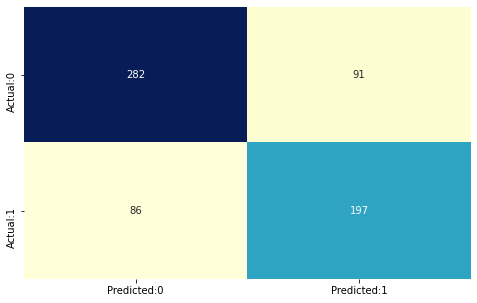

In [54]:
from sklearn.metrics import confusion_matrix
#computing the confusion matrix
#set size of the plot

cm = confusion_matrix(y_test, y_pred_dt)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()


In [55]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_pred_dt)
print(result)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       373
           1       0.68      0.70      0.69       283

    accuracy                           0.73       656
   macro avg       0.73      0.73      0.73       656
weighted avg       0.73      0.73      0.73       656



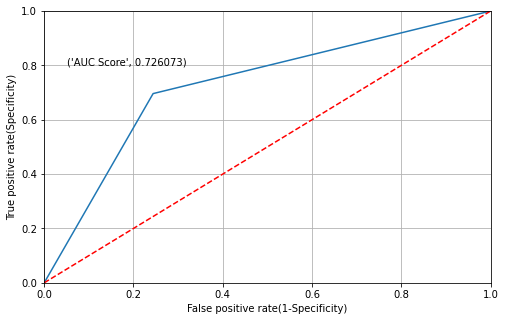

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_dt)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.05,y=0.8,s=('AUC Score',round(roc_auc_score(y_test,y_pred_dt),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [57]:
import sklearn.metrics as metrics
#compiling the required information
metrics = pd.Series({"Model" : "Decision tree", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_svm),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_svm),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_svm),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_svm),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_svm)})
#appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684
2,KNN,0.574300,0.502994,0.593640,0.571646,0.544571
3,SVM,0.609579,0.545161,0.597173,0.611280,0.569983
4,Decision tree,0.609579,0.545161,0.597173,0.611280,0.569983


### 5.6 Random Forest
<a id='random_forest'></a>


#### Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [58]:
from sklearn.ensemble import RandomForestClassifier
print('Random Forest Classifier\n')
Rfc = RandomForestClassifier()
Rfc.fit(x_train, y_train)

y_Rfc = Rfc.predict(x_test)


Random Forest Classifier



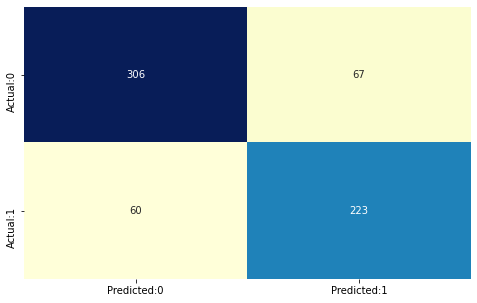

In [59]:
#computing the confusion matrix
#set size of the plot

cm = confusion_matrix(y_test, y_Rfc)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()


In [60]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_Rfc)
print(result)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       373
           1       0.77      0.79      0.78       283

    accuracy                           0.81       656
   macro avg       0.80      0.80      0.80       656
weighted avg       0.81      0.81      0.81       656



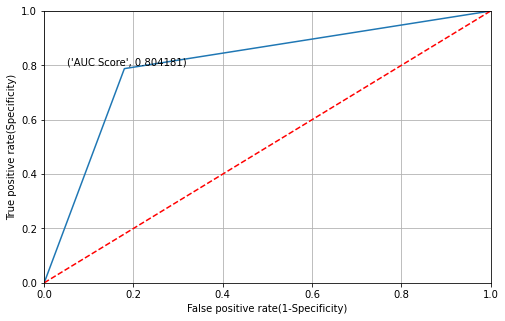

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_Rfc)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.05,y=0.8,s=('AUC Score',round(roc_auc_score(y_test,y_Rfc),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [62]:
import sklearn.metrics as metrics
#compiling the required information
metrics = pd.Series({"Model" : "Random Forest", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_Rfc),
                                    "Precision Score" : metrics.precision_score(y_test, y_Rfc),
                                    "Recall Score" : metrics.recall_score(y_test, y_Rfc),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_Rfc),
                                    "f1-score" : metrics.f1_score(y_test, y_Rfc)})
#appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684
2,KNN,0.574300,0.502994,0.593640,0.571646,0.544571
3,SVM,0.609579,0.545161,0.597173,0.611280,0.569983
4,Decision tree,0.609579,0.545161,0.597173,0.611280,0.569983
5,Random Forest,0.804181,0.768966,0.787986,0.806402,0.778360


#### From the above table we can see Random forest is giving the best results comparing to rest of the classifier models but further we are checking the accuracy using boosting methods for better comparision

## Boosting methods

## We are using Boosting method to further check the accuracy as the boosting method reduces the training error and works sequentially

### 5.7 ADA BOOST
<a id='ada'></a>


#### AdaBoost also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. 

In [63]:
from sklearn.ensemble import AdaBoostClassifier

#build the model
adaboost = AdaBoostClassifier(random_state=10)

#fit the model
adaboost.fit(x_train, y_train)

#predict the values
y_pred_adboost = adaboost.predict(x_test)

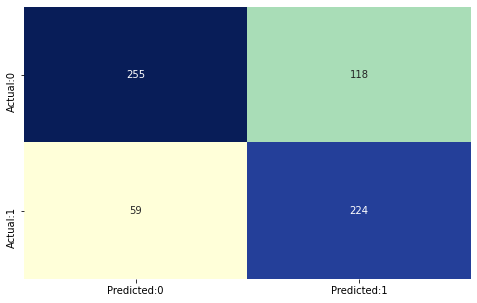

In [64]:
from sklearn.metrics import confusion_matrix
#computing the confusion matrix
#set size of the plot

cm = confusion_matrix(y_test, y_pred_adboost)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()


In [65]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_pred_adboost)
print(result)

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       373
           1       0.65      0.79      0.72       283

    accuracy                           0.73       656
   macro avg       0.73      0.74      0.73       656
weighted avg       0.74      0.73      0.73       656



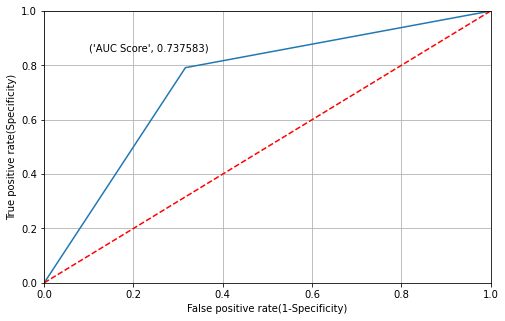

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_adboost)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.1,y=0.85,s=('AUC Score',round(roc_auc_score(y_test,y_pred_adboost),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [67]:
import sklearn.metrics as metrics
#compiling the required information
metrics = pd.Series({"Model" : "ADA BOOST", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_adboost),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_adboost),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_adboost),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_adboost),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_adboost)})
#appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684
2,KNN,0.574300,0.502994,0.593640,0.571646,0.544571
3,SVM,0.609579,0.545161,0.597173,0.611280,0.569983
4,Decision tree,0.609579,0.545161,0.597173,0.611280,0.569983
5,Random Forest,0.804181,0.768966,0.787986,0.806402,0.778360
6,ADA BOOST,0.737583,0.654971,0.791519,0.730183,0.716800


### 5.8 XGBM Model
<a id='xgbm'></a>


#### Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

In [68]:
from xgboost.sklearn import XGBClassifier

#build the model
xgbm = XGBClassifier(random_state=10)

#fit the model
xgbm.fit(x_train, y_train)

#predict the values
y_pred_xgbm = xgbm.predict(x_test)

[19:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


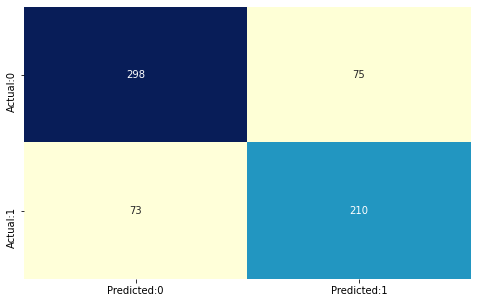

In [69]:
from sklearn.metrics import confusion_matrix
#computing the confusion matrix
#set size of the plot

cm = confusion_matrix(y_test, y_pred_xgbm)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()



In [70]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_pred_xgbm)
print(result)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       373
           1       0.74      0.74      0.74       283

    accuracy                           0.77       656
   macro avg       0.77      0.77      0.77       656
weighted avg       0.77      0.77      0.77       656



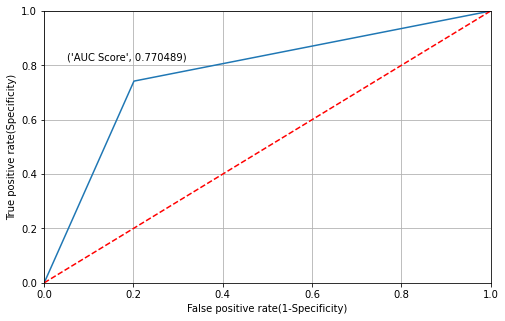

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_xgbm)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.05,y=0.82,s=('AUC Score',round(roc_auc_score(y_test,y_pred_xgbm),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [72]:
import sklearn.metrics as metrics
#compiling the required information
metrics = pd.Series({"Model" : "XGBM", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_xgbm),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_xgbm),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_xgbm),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_xgbm),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_xgbm)})
#appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684
2,KNN,0.574300,0.502994,0.593640,0.571646,0.544571
3,SVM,0.609579,0.545161,0.597173,0.611280,0.569983
4,Decision tree,0.609579,0.545161,0.597173,0.611280,0.569983
5,Random Forest,0.804181,0.768966,0.787986,0.806402,0.778360
6,ADA BOOST,0.737583,0.654971,0.791519,0.730183,0.716800
7,XGBM,0.770489,0.736842,0.742049,0.774390,0.739437


### 5.9 Bagging classifier
<a id='bag'></a>

#### A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

meta_estimator.fit(x_train,y_train)

y_pred_bag = meta_estimator.predict(x_test)

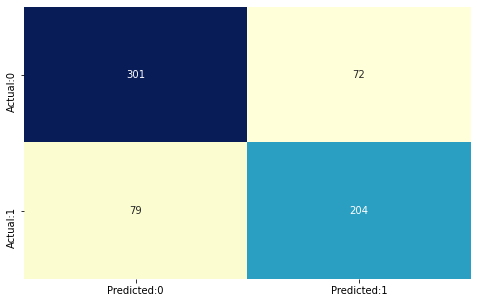

In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_bag)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu",cbar=False)

plt.show()


In [75]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_pred_bag)
print(result)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       373
           1       0.74      0.72      0.73       283

    accuracy                           0.77       656
   macro avg       0.77      0.76      0.76       656
weighted avg       0.77      0.77      0.77       656



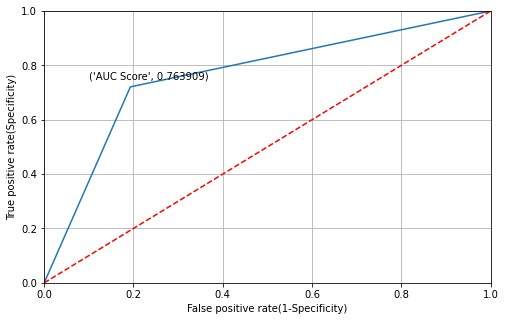

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_bag)
# plor ROC curve
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')  # r-- : Red dashed line

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance
#to add AOC score
plt.text(x=0.1,y=0.75,s=('AUC Score',round(roc_auc_score(y_test,y_pred_bag),6)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [77]:
import sklearn.metrics as metrics
#compiling the required information
metrics = pd.Series({"Model" : "Bagging classifier", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_bag),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_bag),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_bag),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_bag),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_bag)})
#appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684
2,KNN,0.574300,0.502994,0.593640,0.571646,0.544571
3,SVM,0.609579,0.545161,0.597173,0.611280,0.569983
4,Decision tree,0.609579,0.545161,0.597173,0.611280,0.569983
5,Random Forest,0.804181,0.768966,0.787986,0.806402,0.778360
6,ADA BOOST,0.737583,0.654971,0.791519,0.730183,0.716800
7,XGBM,0.770489,0.736842,0.742049,0.774390,0.739437
8,Bagging classifier,0.763909,0.739130,0.720848,0.769817,0.729875


# Results of all models build
<a id='conclusion'></a>

In [78]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,logistic_regression,0.502591,0.434084,0.477032,0.506098,0.454545
1,Naive Bayes,0.534763,0.470383,0.477032,0.542683,0.473684
2,KNN,0.574300,0.502994,0.593640,0.571646,0.544571
3,SVM,0.609579,0.545161,0.597173,0.611280,0.569983
4,Decision tree,0.609579,0.545161,0.597173,0.611280,0.569983
5,Random Forest,0.804181,0.768966,0.787986,0.806402,0.778360
6,ADA BOOST,0.737583,0.654971,0.791519,0.730183,0.716800
7,XGBM,0.770489,0.736842,0.742049,0.774390,0.739437
8,Bagging classifier,0.763909,0.739130,0.720848,0.769817,0.729875


### Comparing all the models Random forest has consistant in precison,recall and accuracy. Hence RANDOM FOREST is the best fit classification model for this dataset.